In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/dataframe.csv',index_col=0)
weather = pd.read_csv('../data/clean_weather.csv', index_col=0)
train = pd.read_csv('../data/train_clean.csv',  index_col=0)

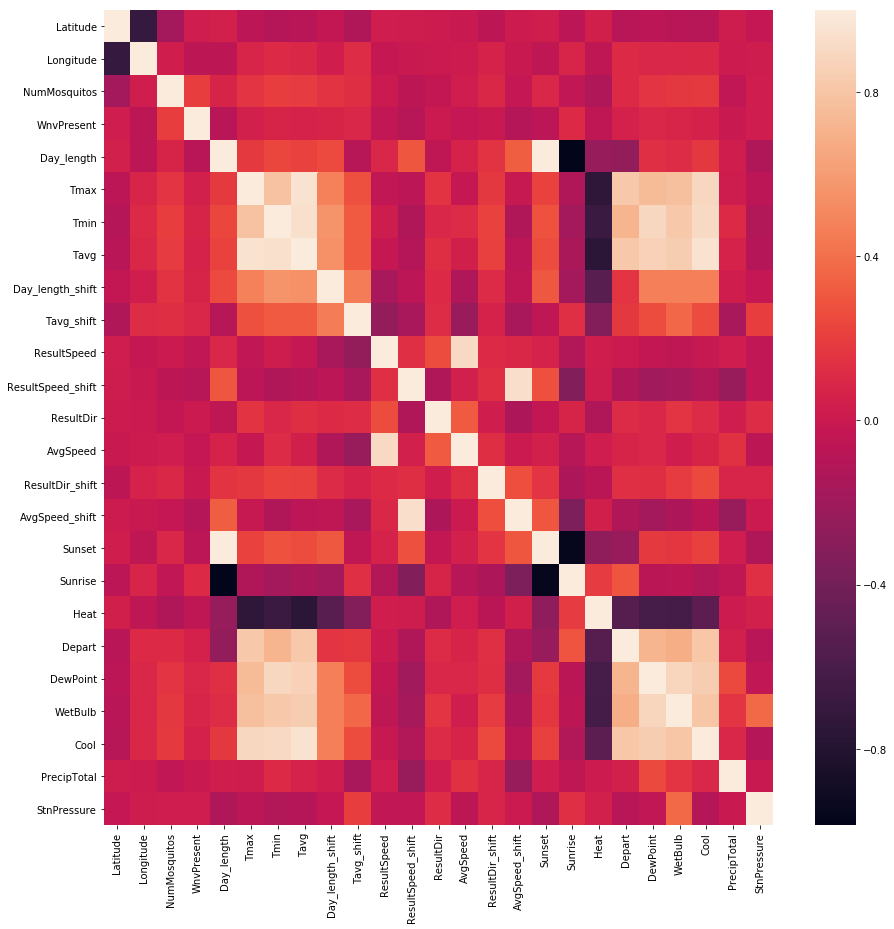

In [3]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr())

In [4]:
df.columns

Index(['Address', 'Species', 'Street', 'Trap', 'AddressNumberAndStreet',
       'Latitude', 'Longitude', 'NumMosquitos', 'WnvPresent', 'Day_length',
       'Tmax', 'Tmin', 'Tavg', 'Day_length_shift', 'Tavg_shift', 'ResultSpeed',
       'ResultSpeed_shift', 'ResultDir', 'AvgSpeed', 'ResultDir_shift',
       'AvgSpeed_shift', 'Sunset', 'Sunrise', 'Heat', 'Depart', 'DewPoint',
       'WetBulb', 'Cool', 'CodeSum', 'PrecipTotal', 'StnPressure'],
      dtype='object')

In [5]:
grouped_traps = df.groupby(['Date','Trap','Species'])[['NumMosquitos', 'WnvPresent']].sum()

In [6]:
flat_groups = grouped_traps.reset_index().set_index('Date')

In [7]:
flat_groups['WnvPresent'] = flat_groups['WnvPresent'].map(lambda x: int(x > 0))

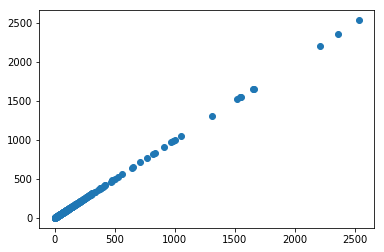

In [8]:
plt.scatter(flat_groups.NumMosquitos.value_counts().index, flat_groups.NumMosquitos.value_counts().index)

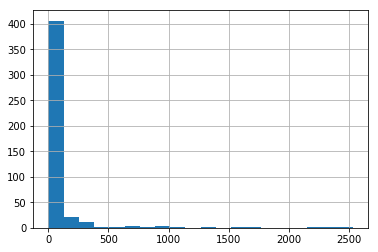

In [9]:
flat_groups[flat_groups['WnvPresent']==1].NumMosquitos.hist(bins=20)

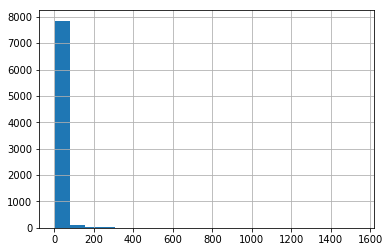

In [10]:
flat_groups[flat_groups['WnvPresent']==0].NumMosquitos.hist(bins=20)

In [20]:
df2 = pd.merge(flat_groups, df[['Day_length','Tmax','Tmin', 'Tavg',
       'Day_length_shift', 'Tavg_shift', 'ResultSpeed', 'ResultSpeed_shift',
       'ResultDir', 'AvgSpeed', 'ResultDir_shift', 'AvgSpeed_shift', 'Sunset',
       'Sunrise', 'Heat', 'Depart', 'DewPoint', 'WetBulb', 'Cool', 'CodeSum',
       'PrecipTotal', 'StnPressure']].drop_duplicates(), how='left', left_index=True, right_index=True)

In [21]:
pd.merge(df2, df[['Latitude', 'Longitude', 'Trap']].drop_duplicates(), how='left', on='Trap')

,Trap,Species,NumMosquitos,WnvPresent,Day_length,Tmax,Tmin,Tavg,Day_length_shift,Tavg_shift,...,Heat,Depart,DewPoint,WetBulb,Cool,CodeSum,PrecipTotal,StnPressure,Latitude,Longitude
0,T002,CULEX PIPIENS/RESTUANS,1,0,1496,88.0,62.5,75.5,NaN,66.000000,...,0.0,10,58.5,65.5,10.5,BR HZ,0.000,29.415,41.954690,-87.800991
1,T002,CULEX RESTUANS,1,0,1496,88.0,62.5,75.5,NaN,66.000000,...,0.0,10,58.5,65.5,10.5,BR HZ,0.000,29.415,41.954690,-87.800991
2,T007,CULEX RESTUANS,1,0,1496,88.0,62.5,75.5,NaN,66.000000,...,0.0,10,58.5,65.5,10.5,BR HZ,0.000,29.415,41.994991,-87.769279
3,T015,CULEX PIPIENS/RESTUANS,1,0,1496,88.0,62.5,75.5,NaN,66.000000,...,0.0,10,58.5,65.5,10.5,BR HZ,0.000,29.415,41.974089,-87.824812
4,T015,CULEX RESTUANS,4,0,1496,88.0,62.5,75.5,NaN,66.000000,...,0.0,10,58.5,65.5,10.5,BR HZ,0.000,29.415,41.974089,-87.824812
5,T045,CULEX RESTUANS,2,0,1496,88.0,62.5,75.5,NaN,66.000000,...,0.0,10,58.5,65.5,10.5,BR HZ,0.000,29.415,41.921600,-87.666455
6,T046,CULEX RESTUANS,1,0,1496,88.0,62.5,75.5,NaN,66.000000,...,0.0,10,58.5,65.5,10.5,BR HZ,0.000,29.415,41.891118,-87.654491
7,T048,CULEX PIPIENS/RESTUANS,1,0,1496,88.0,62.5,75.5,NaN,66.000000,...,0.0,10,58.5,65.5,10.5,BR HZ,0.000,29.415,41.867108,-87.654224
8,T048,CULEX RESTUANS,2,0,1496,88.0,62.5,75.5,NaN,66.000000,...,0.0,10,58.5,65.5,10.5,BR HZ,0.000,29.415,41.867108,-87.654224
9,T049,CULEX RESTUANS,1,0,1496,88.0,62.5,75.5,NaN,66.000000,...,0.0,10,58.5,65.5,10.5,BR HZ,0.000,29.415,41.896282,-87.655232


In [12]:
df.shape

(10506, 31)